In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy.fft import *

In [2]:
def filter_low(w, wc):
    return wc**2 / (-w**2 + 1j * np.sqrt(2) * wc * w + 1)

def filter_high(w, wc):
    return w**2 / (-wc**2 + 1j * np.sqrt(2) * wc * w + 1)

In [60]:
freqs = [150,450,50]
wc=50
fs = 1000
t = np.arange(0, 1, 1/fs)
signal = np.zeros_like(t)
w = np.linspace(0, 1000, 10000)

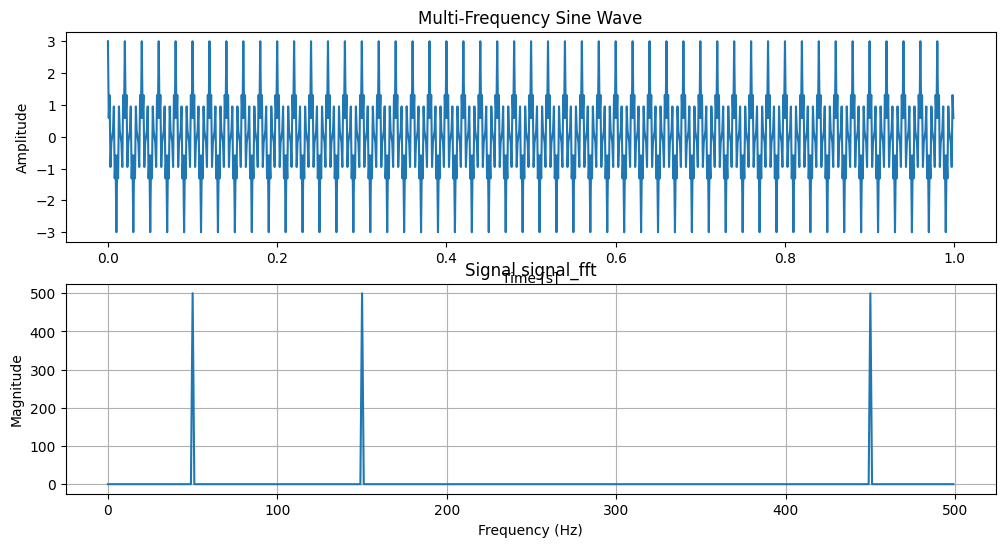

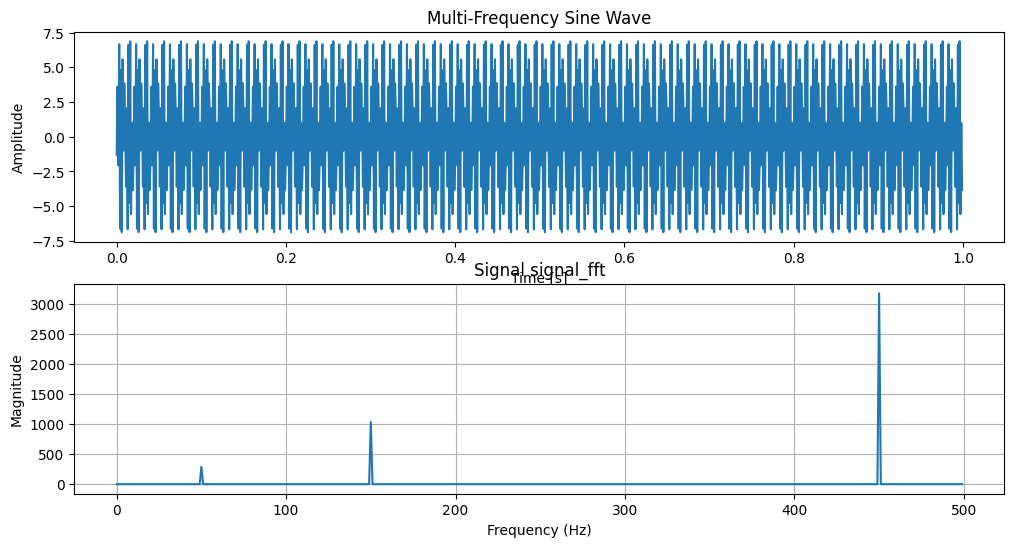

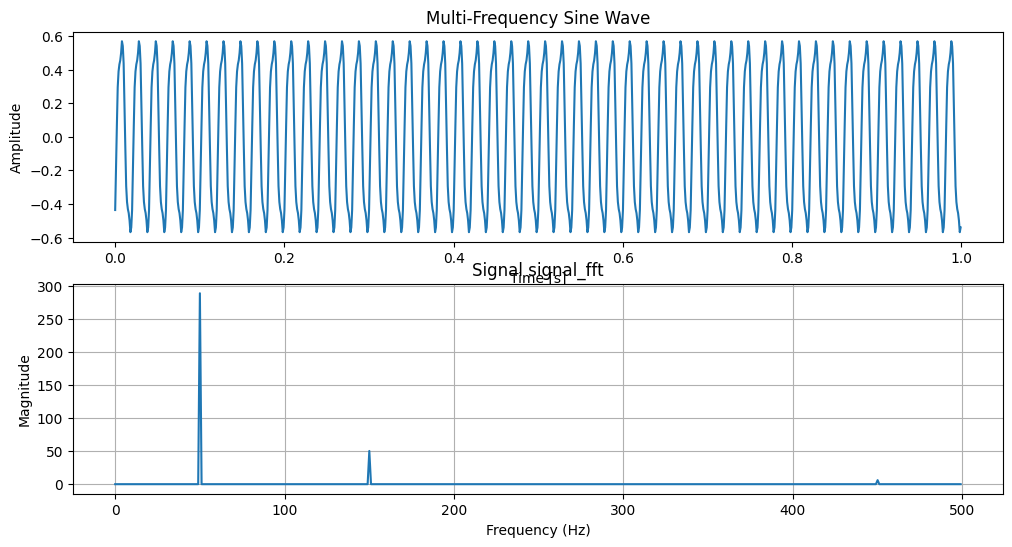

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация сигнала из трех синусоид с частотами 50 Гц, 150 Гц и 450 Гц
def generate_signal(t):
    return np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 150 * t) + np.sin(2 * np.pi * 450 * t)

# Временная ось
t = np.linspace(0, 0.1, 1000)  # 0.1 секунды для удобства визуализации

# Генерация сигнала
signal = generate_signal(t)

# Частотная ось
frequencies = np.fft.fftfreq(len(t), d=t[1] - t[0])
frequencies = np.fft.fftshift(frequencies)  # Сдвигаем частоты для удобства визуализации

# Параметры ядра Гаусса
p = 0  # Пиковая частота (центральная частота)
w_narrowband = 50  # Ширина полосы на половине максимума (FWHM) для узкополосного фильтра
w_lowpass = 200  # Ширина полосы на половине максимума (FWHM) для фильтра нижних частот

# Ядро Гаусса в частотной области для узкополосного фильтра
gaussian_kernel_freq_narrowband = np.exp(-5 * (frequencies - p)**2 / w_narrowband**2)

# Ядро Гаусса в частотной области для фильтра нижних частот
gaussian_kernel_freq_lowpass = np.exp(-5 * (frequencies - p)**2 / w_lowpass**2)

# Преобразование Фурье сигнала
signal_fft = np.fft.fft(signal)
signal_fft = np.fft.fftshift(signal_fft)  # Сдвигаем спектр для удобства визуализации

# Умножение в частотной области для узкополосного фильтра
smoothed_signal_fft_narrowband = signal_fft * gaussian_kernel_freq_narrowband

# Умножение в частотной области для фильтра нижних частот
smoothed_signal_fft_lowpass = signal_fft * gaussian_kernel_freq_lowpass

# Обратное преобразование Фурье для узкополосного фильтра
smoothed_signal_ifft_narrowband = np.fft.ifft(np.fft.ifftshift(smoothed_signal_fft_narrowband))

# Обратное преобразование Фурье для фильтра нижних частот
smoothed_signal_ifft_lowpass = np.fft.ifft(np.fft.ifftshift(smoothed_signal_fft_lowpass))

# Визуализация
plt.figure(figsize=(12, 16))

plt.subplot(5, 1, 1)
plt.plot(t, signal, label='Исходный сигнал')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(frequencies, np.abs(gaussian_kernel_freq_narrowband), label='Ядро Гаусса (узкополосный фильтр)')
plt.xlabel('Частота (Гц)')
plt.xlim(0, 500)
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(t, np.real(smoothed_signal_ifft_narrowband), label='Сглаженный сигнал (узкополосный фильтр)')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, np.real(smoothed_signal_ifft_lowpass), label='Сглаженный сигнал (фильтр нижних частот)')
plt.legend()

# График распределения частот до и после фильтрации
plt.subplot(5, 1, 5)
plt.plot(frequencies, np.abs(signal_fft), label='Спектр исходного сигнала')
plt.plot(frequencies, np.abs(smoothed_signal_fft_narrowband), label='Спектр после узкополосного фильтра')
plt.plot(frequencies, np.abs(smoothed_signal_fft_lowpass), label='Спектр после фильтра нижних частот')
plt.xlabel('Частота (Гц)')
plt.xlim(0, 500)
plt.legend()

plt.show()

In [47]:
koef_pf = koef_high*koef_low
koef_zf = koef_high+koef_low

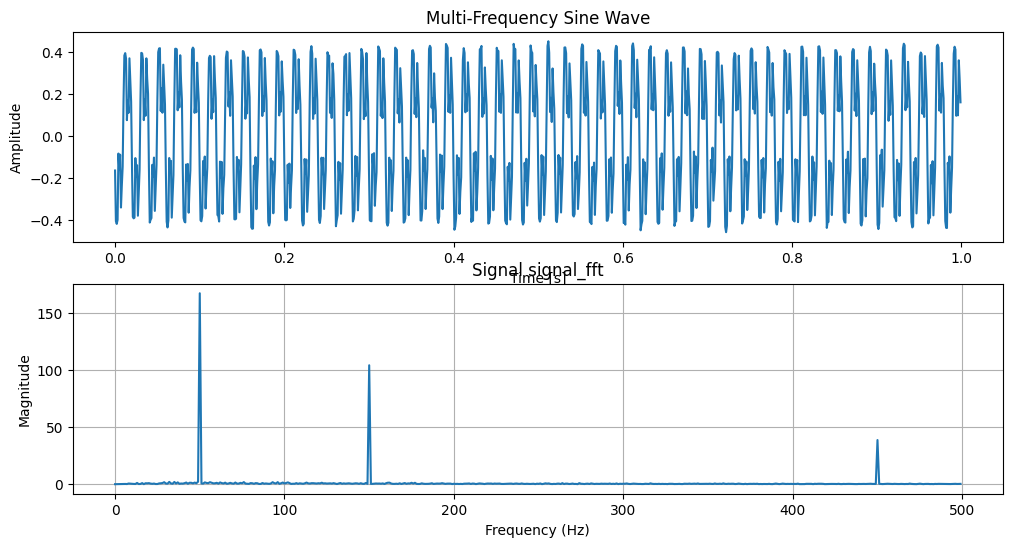

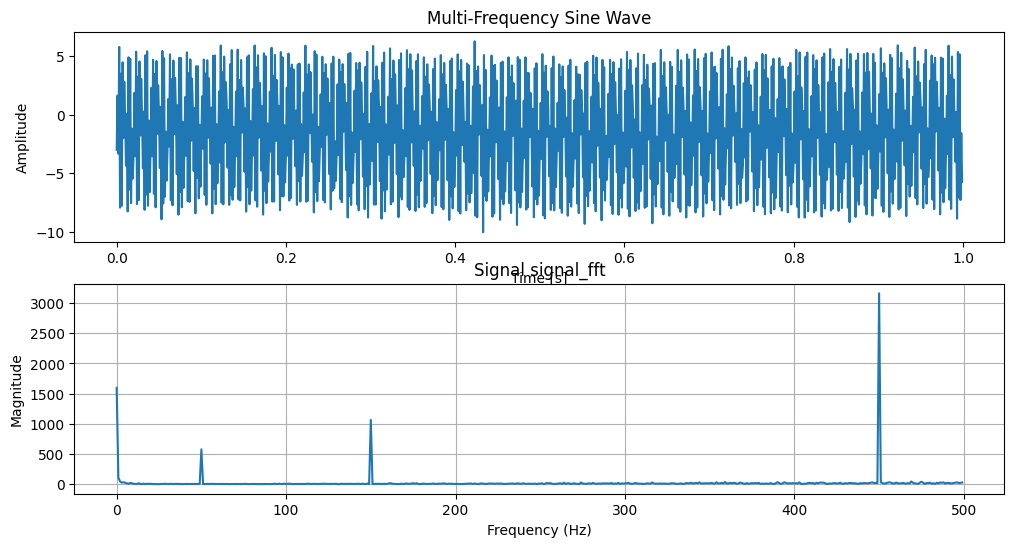

In [48]:
filtered_signal_zf = np.fft.ifft(np.fft.fft(signal) * koef_zf[:len(signal)])

filtered_signal_zf_fft = np.fft.fft(signal) * koef_zf[:len(signal)]

filtered_signal_pf = np.fft.ifft(np.fft.fft(signal) * koef_pf[:len(signal)])

filtered_signal_pf_fft = np.fft.fft(signal) * koef_pf[:len(signal)]

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, filtered_signal_pf.real)
plt.title('Multi-Frequency Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(signal_freqs[:len(signal_freqs)//2], np.abs(filtered_signal_pf_fft)[:len(filtered_signal_pf_fft)//2])
plt.title('Signal signal_fft')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, filtered_signal_zf.real)
plt.title('Multi-Frequency Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(signal_freqs[:len(signal_freqs)//2], np.abs(filtered_signal_zf_fft)[:len(filtered_signal_zf_fft)//2])
plt.title('Signal signal_fft')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

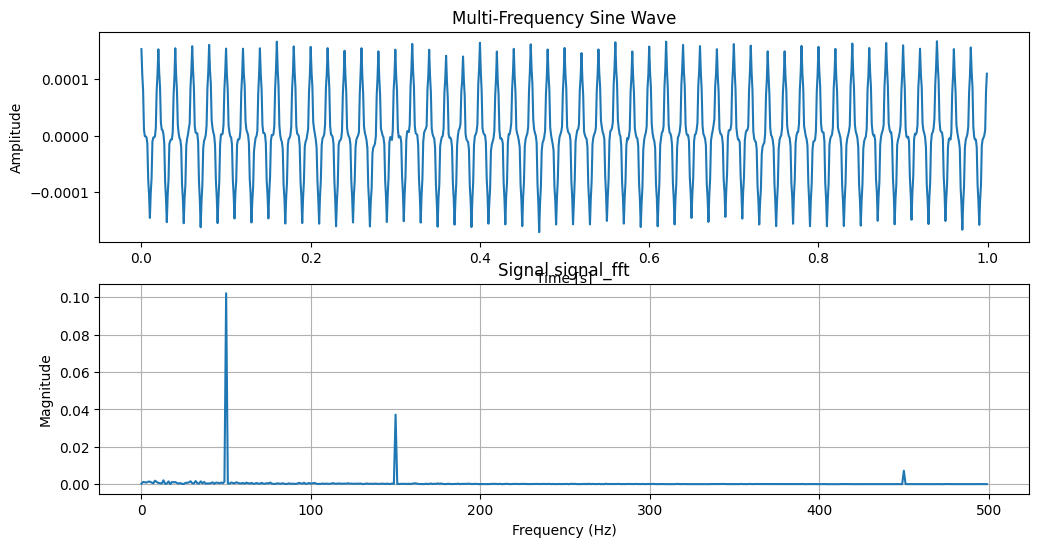

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def butterworth_filter(order, cutoff, fs):
    normal_cutoff = cutoff
    z = np.linspace(0, 500, 1000)
    
    # Полюса фильтра
    poles = []
    for k in range(1, order + 1):
        angle = (2 * k + order - 1) * np.pi / (2 * order)
        pole = normal_cutoff * np.exp(1j * angle)
        poles.append(pole)
    
    # Вычисление функции передачи
    H = 1
    for pole in poles:
        H /= (z - pole)
    
    return H

# Параметры фильтра
order = 2
cutoff = 50
fs = 1.0

# Генерация фильтра
H = butterworth_filter(order, cutoff, fs)

filtered_signal_5 = np.fft.ifft(np.fft.fft(signal) * H[:len(signal)])

filtered_signal_5_fft = np.fft.fft(signal) * H[:len(signal)]

# Визуализация

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, filtered_signal_5.real)
plt.title('Multi-Frequency Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(signal_freqs[:len(signal_freqs)//2], np.abs(filtered_signal_5_fft)[:len(filtered_signal_5_fft)//2])
plt.title('Signal signal_fft')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

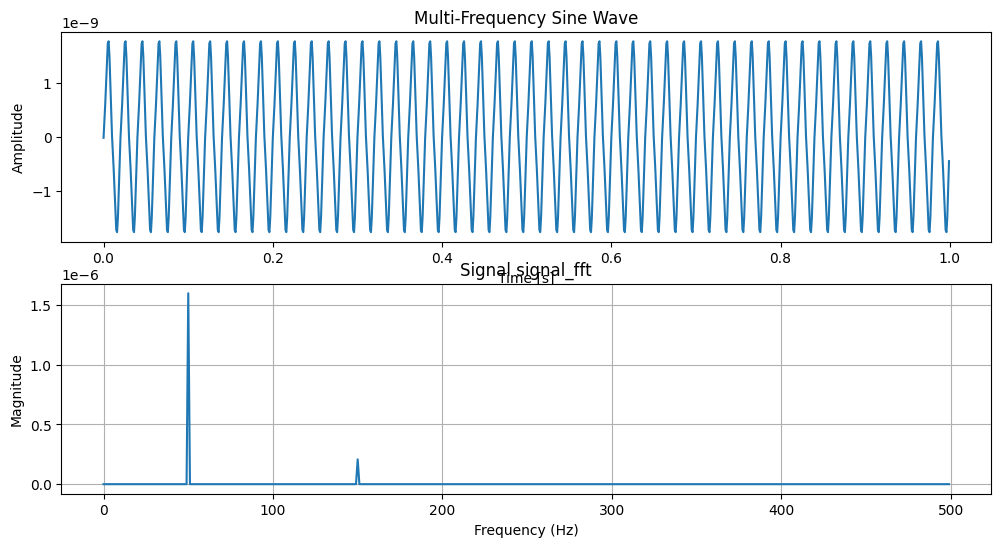

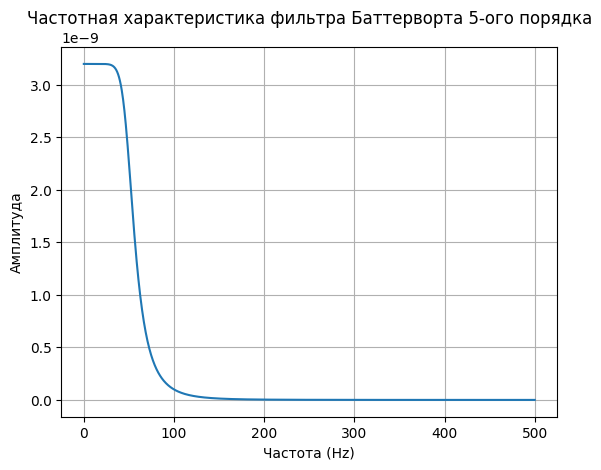

In [63]:
import numpy as np
import matplotlib.pyplot as plt

class ButterworthFilter:
    def __init__(self, order, cutoff_frequency):
        self.order = order
        self.cutoff_frequency = cutoff_frequency
        self.poles = self.calculate_poles()

    def calculate_poles(self):
        # Определяем полюса фильтра Баттерворта
        poles = []
        for k in range(1, self.order + 1):
            angle = (2 * k + self.order - 1) * np.pi / (2 * self.order)
            pole = self.cutoff_frequency * np.exp(1j * angle)
            poles.append(pole)
        return poles

    def transfer_function(self, s):
        # Вычисляем передаточную функцию Hn(S)
        numerator = 1
        denominator = 1
        for pole in self.poles:
            denominator *= (s - pole)
        return numerator / denominator

    def frequency_response(self, frequencies):
        # Вычисляем частотную характеристику
        response = []
        for freq in frequencies:
            s = 1j * freq
            response.append(self.transfer_function(s))
        return np.array(response)

# Параметры фильтра
order = 5
cutoff_frequency = 50.0
frequencies = np.linspace(0, 500, 1000)

# Создание и анализ фильтра
butter_filter = ButterworthFilter(order, cutoff_frequency)
response = butter_filter.frequency_response(frequencies)

# Визуализация частотной характеристики

filtered_signal_5 = np.fft.ifft(np.fft.fft(signal) * response[:len(signal)])

filtered_signal_5_fft = np.fft.fft(signal) * response[:len(signal)]

# Визуализация

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, filtered_signal_5.real)
plt.title('Multi-Frequency Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(signal_freqs[:len(signal_freqs)//2], np.abs(filtered_signal_5_fft)[:len(filtered_signal_5_fft)//2])
plt.title('Signal signal_fft')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()


plt.plot(frequencies, np.abs(response))
plt.title('Частотная характеристика фильтра Баттерворта 5-ого порядка')
plt.xlabel('Частота (Hz)')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()


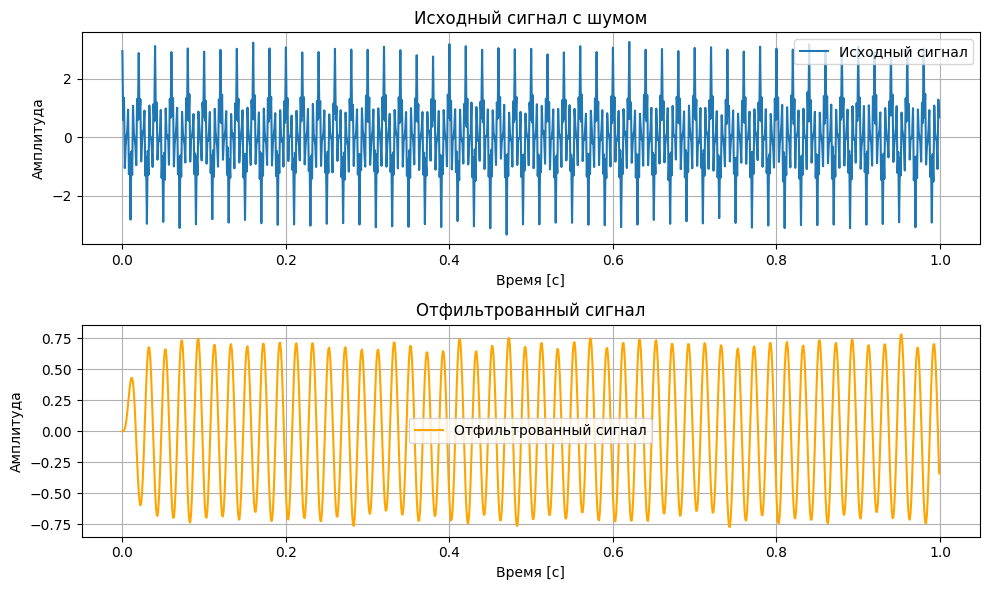

In [51]:
from scipy.signal import butter, lfilter

# Функция для создания фильтра Баттерворда
def butterworth_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

# Параметры фильтра
order = 5
cutoff = 50.0  # Частота среза
fs = 1000
# Генерация тестового сигнала
T = 1  # Длительность сигнала
n = int(T * fs)  # Количество точек
t = np.linspace(0, T, n, endpoint=False)  # Временная ось
# Создание сигнала с шумом
# a = 0.02
# signal = np.sin(1.2 * 2 * np.pi * t) + a * np.random.randn(n)

# Применение фильтра
filtered_signal = butterworth_filter(signal, cutoff, fs, order)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Исходный сигнал')
plt.title('Исходный сигнал с шумом')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', color='orange')
plt.title('Отфильтрованный сигнал')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

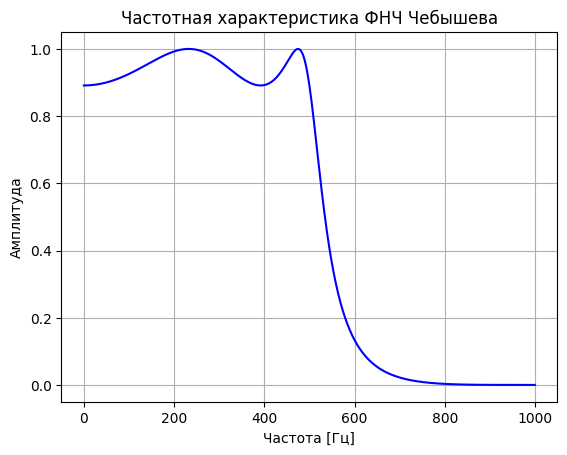

In [59]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def chebyshev_lowpass_filter(order, cutoff_freq, sampling_rate):
    # Нормализуем частоту отсечения
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist
    
    # Получаем коэффициенты фильтра Чебышева
    b, a = signal.cheby1(order, 1, normal_cutoff, btype='low', analog=False)
    
    return b, a

def plot_frequency_response(b, a):
    w, h = signal.freqz(b, a, worN=2000)
    plt.plot(0.5 * sampling_rate * w / np.pi, np.abs(h), 'b')
    plt.title('Частотная характеристика ФНЧ Чебышева')
    plt.xlabel('Частота [Гц]')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.show()

# Параметры фильтра
order = 4  # Порядок фильтра
cutoff_freq = 500  # Частота отсечения в Гц
sampling_rate = 2000  # Частота дискретизации в Гц

# Генерация фильтра
b, a = chebyshev_lowpass_filter(order, cutoff_freq, sampling_rate)

# Построение частотной характеристики
plot_frequency_response(b, a)